In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [77]:
df = pd.read_csv("apy.csv")

In [78]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [79]:
df.shape

(246091, 7)

In [80]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [82]:
df.describe(include="all")

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
count,246091,246091,246091.000000,246091,246091,2.460910e+05,2.423610e+05
unique,33,646,NaN,6,124,NaN,NaN
top,Uttar Pradesh,BIJAPUR,NaN,Kharif,Rice,NaN,NaN
freq,33306,945,NaN,95951,15104,NaN,NaN
mean,NaN,NaN,2005.643018,NaN,NaN,1.200282e+04,5.825034e+05
std,NaN,NaN,4.952164,NaN,NaN,5.052340e+04,1.706581e+07
min,NaN,NaN,1997.000000,NaN,NaN,4.000000e-02,0.000000e+00
25%,NaN,NaN,2002.000000,NaN,NaN,8.000000e+01,8.800000e+01
50%,NaN,NaN,2006.000000,NaN,NaN,5.820000e+02,7.290000e+02
75%,NaN,NaN,2010.000000,NaN,NaN,4.392000e+03,7.023000e+03


In [83]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

<Axes: >

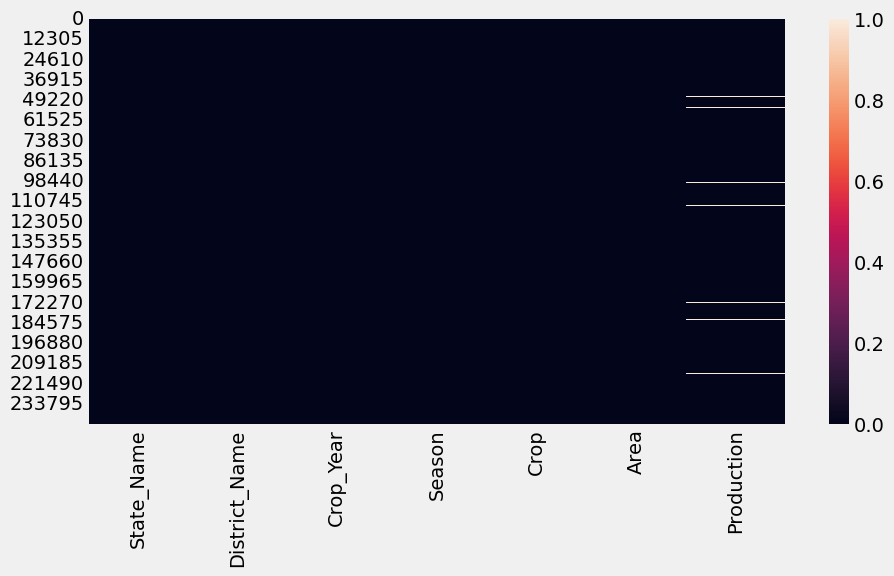

In [84]:
plt.figure(figsize=(10 , 5))
sns.heatmap(df.isnull())

- here we can se there are some missing values in Production Column
- we'll handle this column in feature engineering

In [85]:
df.duplicated().sum()

0

- there are no duplicates in our data frame

## Explotratory Data Analysis

In [86]:
df["State_Name"].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [87]:
len(df["State_Name"].unique())

33

- here we can see that are totall 33 unique state in our dataset

In [88]:
df["State_Name"].value_counts()

State_Name
Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                    

<Axes: xlabel='count', ylabel='State_Name'>

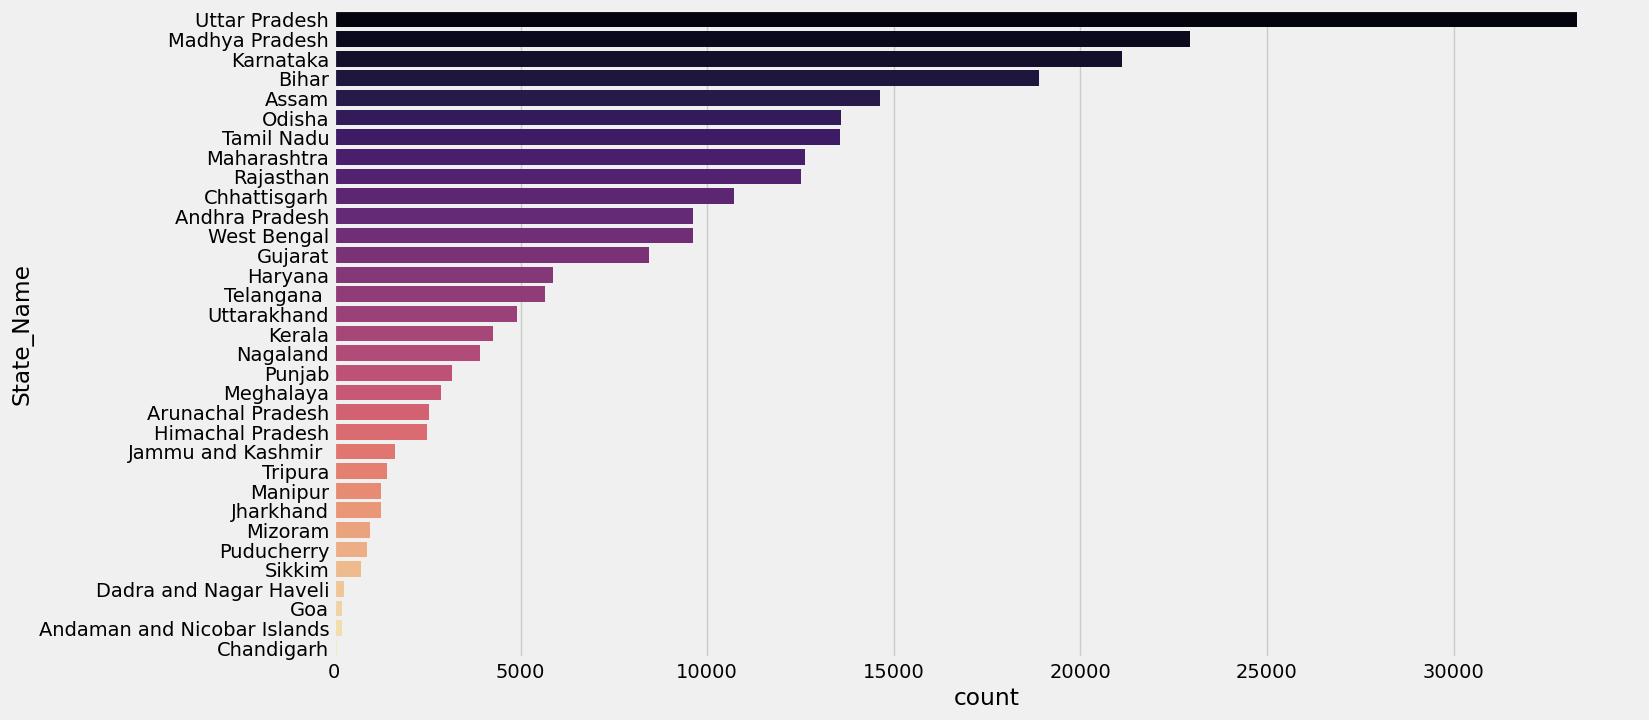

In [89]:
plt.figure(figsize = (15 , 8))
plt.style.use("fivethirtyeight")
sns.countplot(y= df["State_Name"], order = df["State_Name"].value_counts(ascending = False).index , palette="magma")

- from the above observation we can see that Uttar Pradesh ,Madhya Pradesh , Karnataka have the top 3 highest number of frequecy
- and Goa , Andaman and Nicobar Islands , Chandigarh are the least

In [90]:
df["District_Name"].unique() 

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [91]:
len(df["District_Name"].unique())

646

- there are total 646 unique values are there in our data

- so now we ll only visualize the top 20 and the least 20 from the district Column

In [92]:
df["District_Name"].value_counts().head(20)

District_Name
BIJAPUR           945
TUMKUR            936
BELGAUM           925
HASSAN            895
BELLARY           887
DAVANGERE         886
AURANGABAD        879
HAVERI            870
CHAMARAJANAGAR    844
CHITRADURGA       840
GULBARGA          833
MYSORE            832
KURNOOL           828
SHIMOGA           825
DHARWAD           825
KADAPA            824
CHIKMAGALUR       820
BILASPUR          815
VISAKHAPATANAM    812
PRAKASAM          808
Name: count, dtype: int64

In [93]:
df["District_Name"].value_counts().tail(20)

District_Name
KARGIL                    37
WEST JAINTIA HILLS        37
REASI                     37
SOUTH WEST KHASI HILLS    35
KISHTWAR                  30
AGAR MALWA                28
PATHANKOT                 26
KULGAM                    25
FAZILKA                   25
BANDIPORA                 22
GANDERBAL                 14
LONGDING                  13
SHOPIAN                   13
RAMBAN                    13
PALGHAR                   11
HYDERABAD                  8
KHUNTI                     6
RAMGARH                    6
NAMSAI                     1
MUMBAI                     1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='District_Name'>

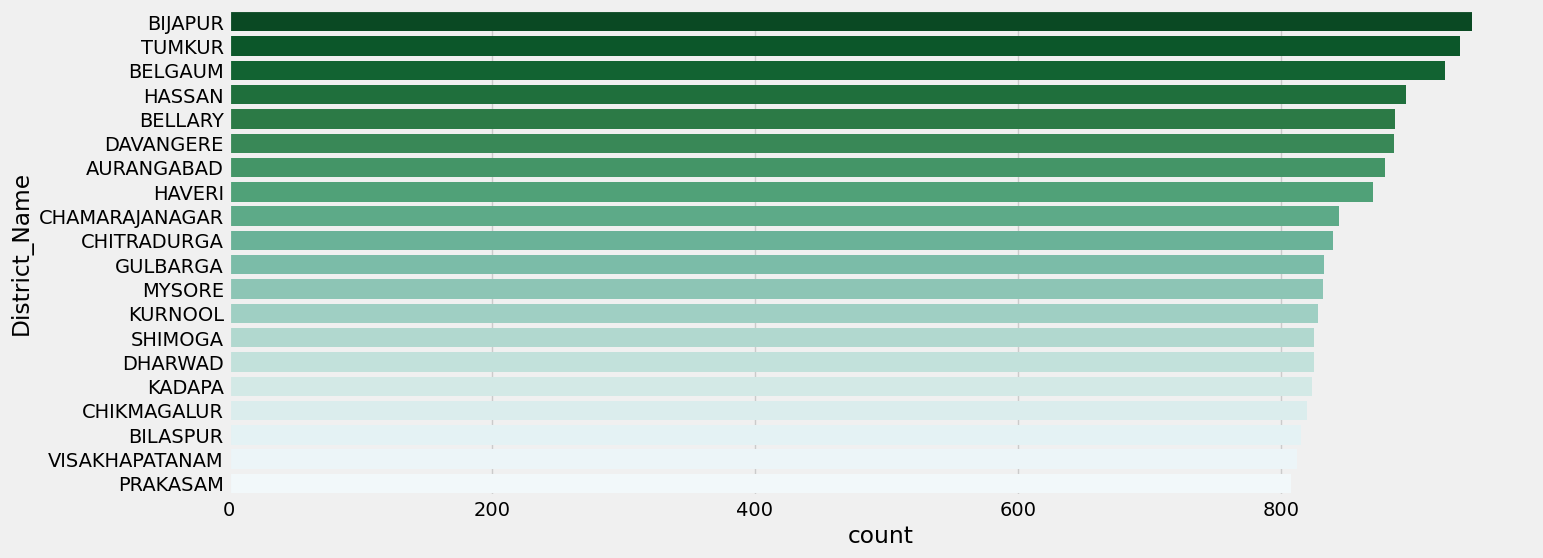

In [94]:
plt.figure(figsize = (15 , 6))
plt.style.use("fivethirtyeight")
sns.countplot(y = df["District_Name"] , order = df["District_Name"].value_counts(ascending = False).head(20).index , palette="BuGn_r")

<Axes: xlabel='count', ylabel='District_Name'>

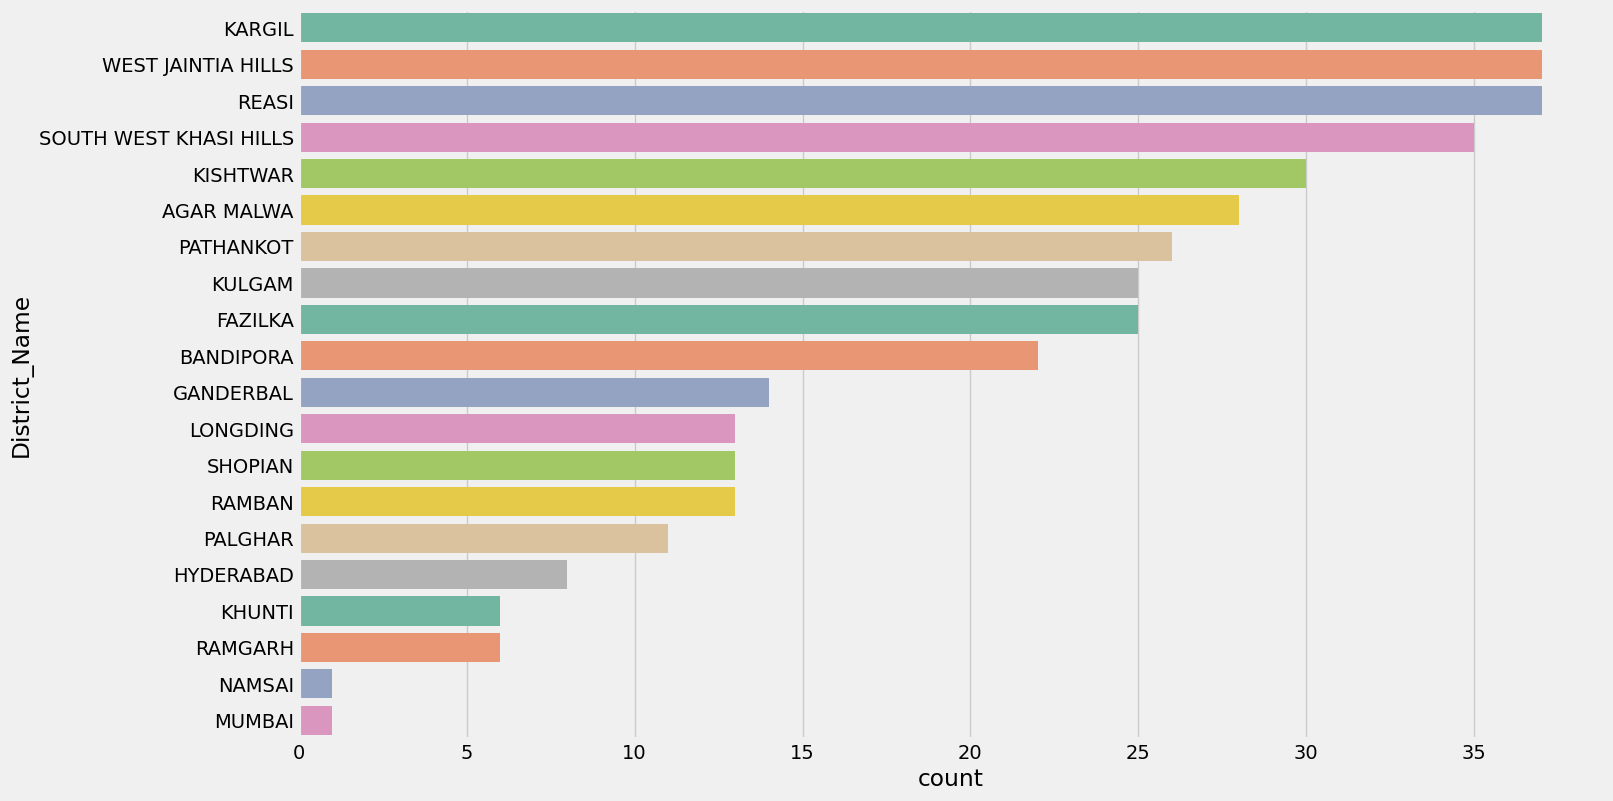

In [95]:
plt.figure(figsize = (15 , 9))
plt.style.use("fivethirtyeight")
sns.countplot(y = df["District_Name"] , order = df["District_Name"].value_counts(ascending = False).tail(20).index, palette="Set2")

In [96]:
df["Crop_Year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [97]:
len(df["Crop_Year"].unique())

19

- there are total 19 unique values in there

In [98]:
df["Crop_Year"].value_counts()

Crop_Year
2003    17287
2002    16671
2008    14550
2007    14526
2006    14328
2004    14117
2009    14116
2011    14071
2010    14065
2005    13799
2000    13658
2013    13650
2012    13410
2001    13361
1999    12515
1998    11533
2014    10973
1997     8899
2015      562
Name: count, dtype: int64

<Axes: xlabel='Crop_Year', ylabel='count'>

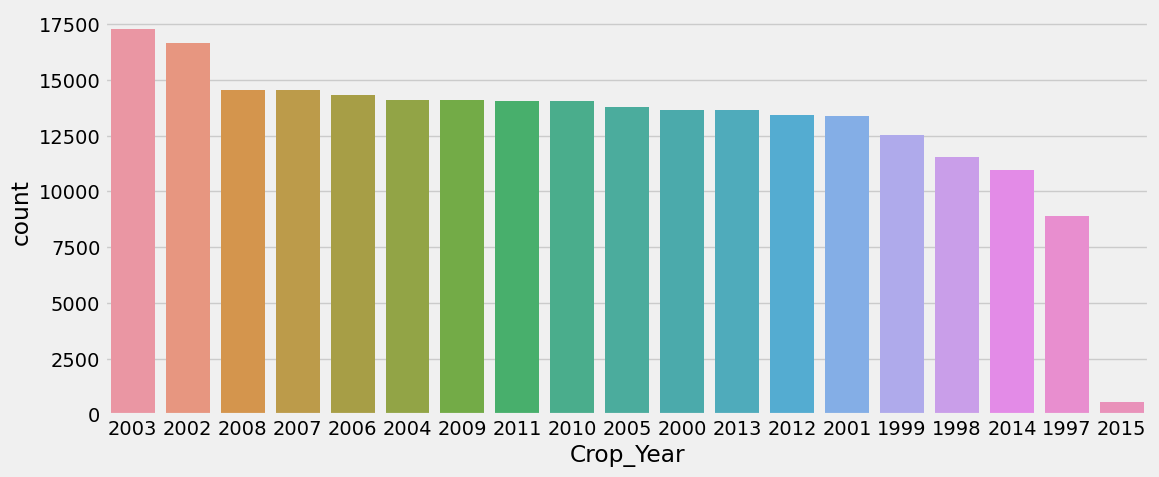

In [99]:
plt.figure(figsize= (12 , 5))
plt.style.use("fivethirtyeight")
sns.countplot(x = df["Crop_Year"], data = df , order = df["Crop_Year"].value_counts().index)
# sns.distplot(df["Crop_Year"])

In [100]:
df["Season"].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [101]:
len(df["Season"].unique())

6

- there are only 6 unique values present in our data

<Axes: ylabel='count'>

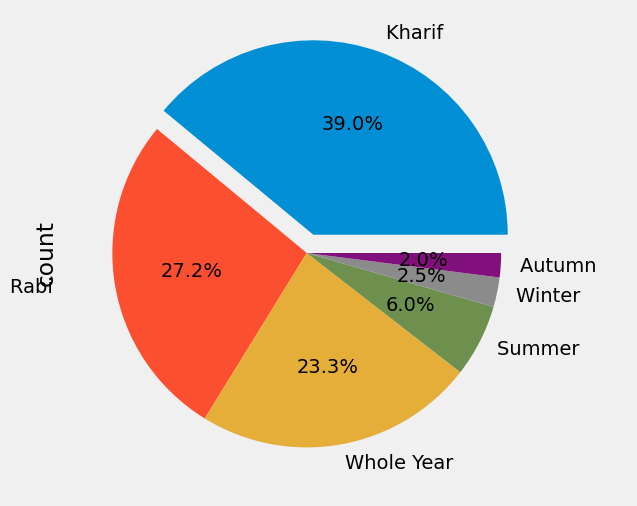

In [102]:
plt.figure(figsize = (7 , 6))
plt.style.use("fivethirtyeight")
df["Season"].value_counts().plot(kind = "pie", autopct = '%1.1f%%', explode = [0.1 ,0.0 , 0.0 , 0.0 , 0.0 , 0.0])

In [103]:
df["Crop"].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

In [104]:
len(df["Crop"].unique())

124

- here we can see that there are total 124 unique crops present in our crop column

<Axes: xlabel='count', ylabel='Crop'>

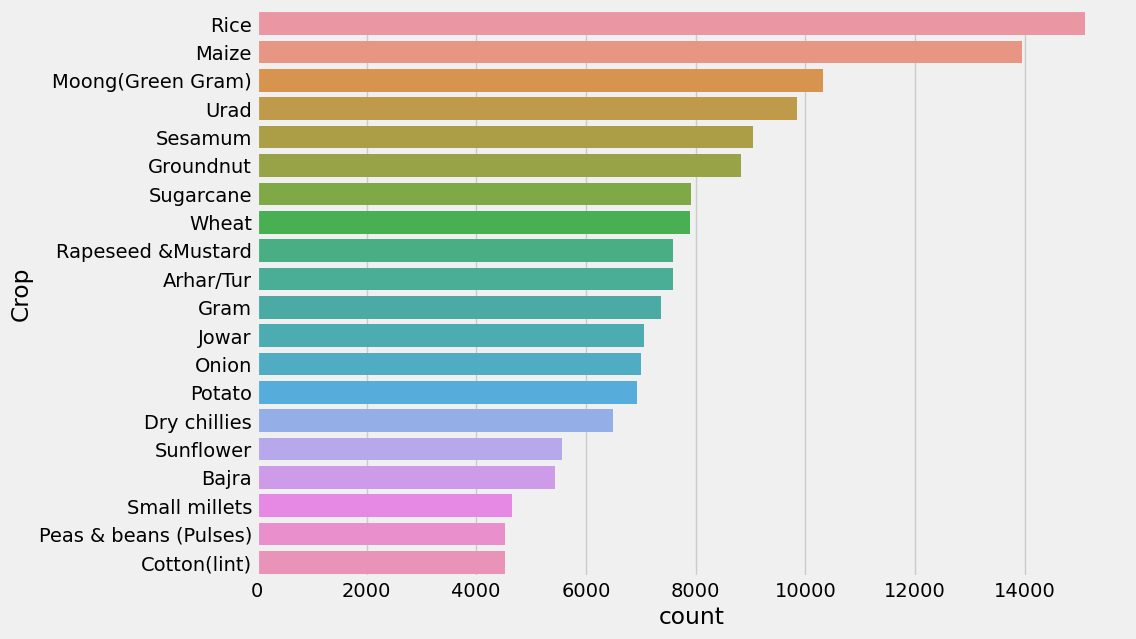

In [105]:
plt.figure(figsize = (10 ,7))
plt.style.use("fivethirtyeight")
sns.countplot(y = df["Crop"], order = df["Crop"].value_counts().head(20).index)

<Axes: xlabel='count', ylabel='Crop'>

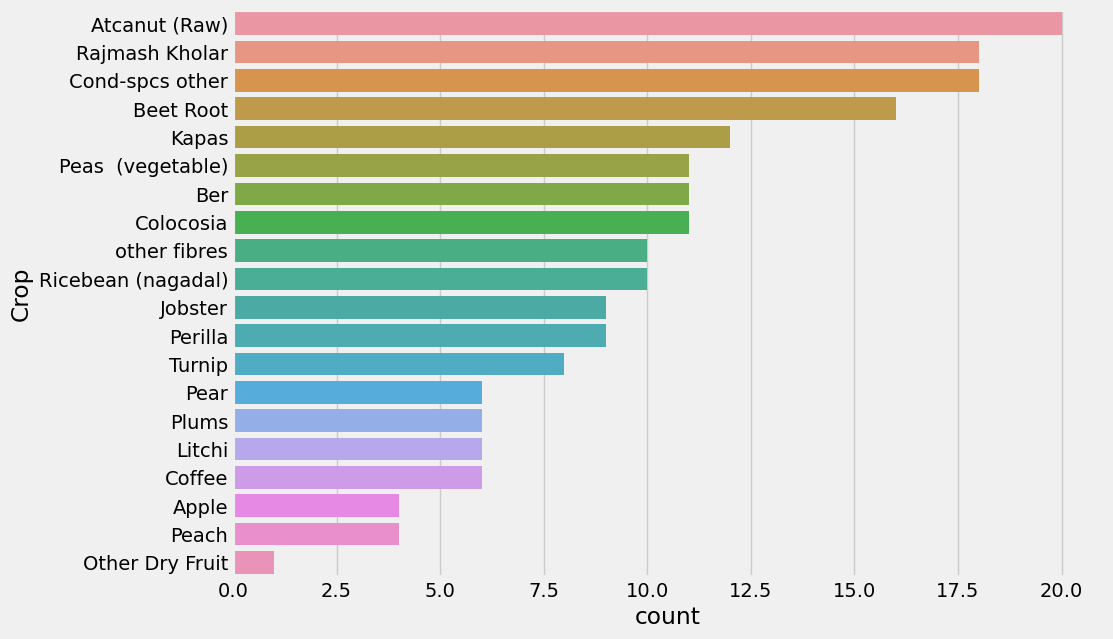

In [106]:
plt.figure(figsize = (10 ,7))
plt.style.use("fivethirtyeight")
sns.countplot(y = df["Crop"], order = df["Crop"].value_counts().tail(20).index)

In [107]:
df["Area"].unique()

array([1.25400e+03, 2.00000e+00, 1.02000e+02, ..., 3.02274e+05,
       1.14930e+04, 2.79151e+05])

In [108]:
len(df["Area"].unique())

38442

C:\Users\shailesh.gaddam\AppData\Local\Temp\ipykernel_5356\96346303.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Area"])


<Axes: xlabel='Area', ylabel='Density'>

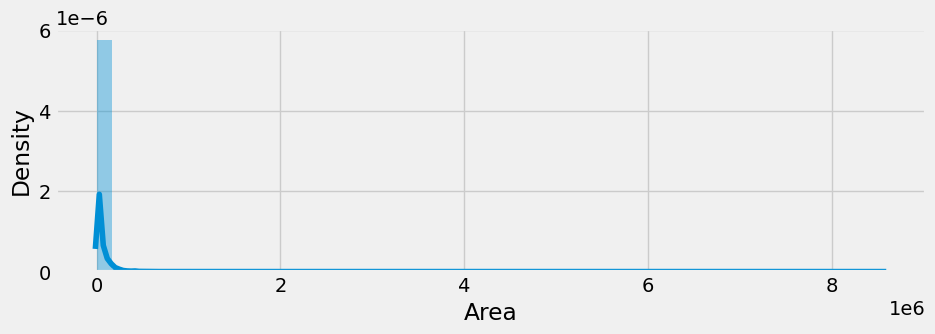

In [109]:
plt.figure(figsize = (10 ,3))
sns.distplot(df["Area"])

In [110]:
df["Production"].unique()

array([2.00000e+03, 1.00000e+00, 3.21000e+02, ..., 7.29553e+05,
       7.30136e+05, 5.97899e+05])

In [111]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


### Bi variate Analysis

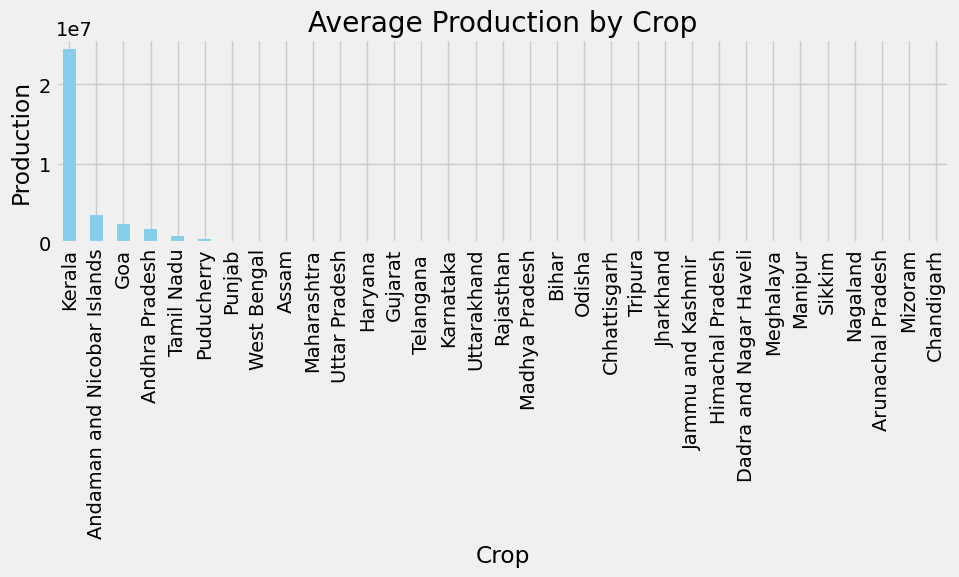

In [112]:
state_wise_production = df.groupby('State_Name')['Production'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
state_wise_production.plot(kind='bar', color='skyblue')
plt.title('Average Production by Crop')
plt.xlabel('Crop')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

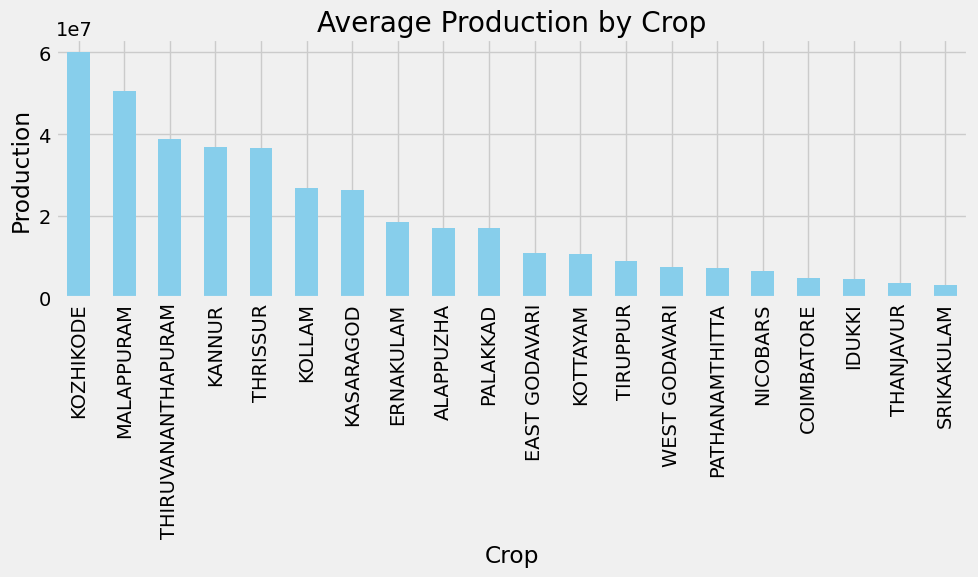

In [113]:
district_wise_production = df.groupby('District_Name')['Production'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
district_wise_production.head(20).plot(kind='bar', color='skyblue')
plt.title('Average Production by Crop')
plt.xlabel('Crop')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

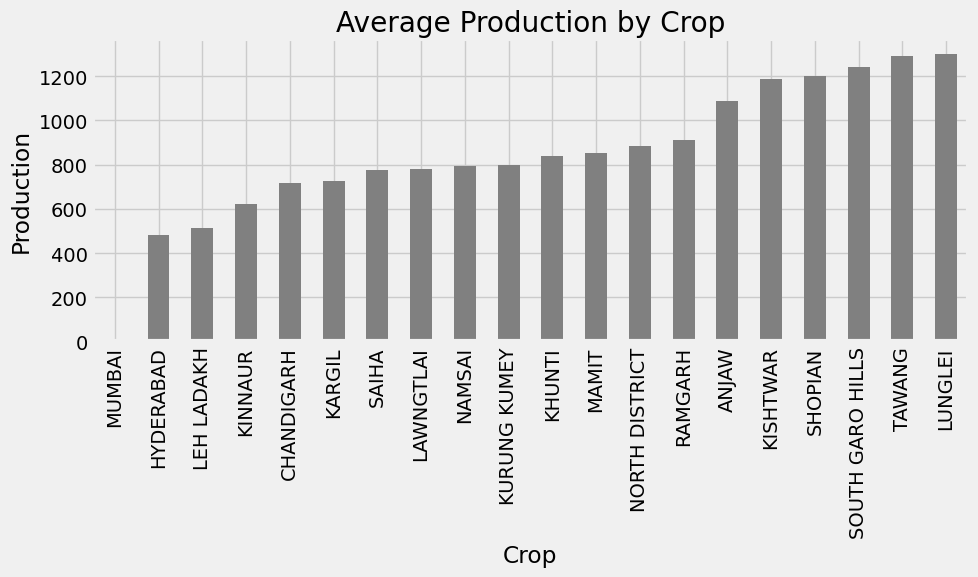

In [114]:
district_wise_production = df.groupby('District_Name')['Production'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
district_wise_production.head(20).plot(kind='bar', color='grey')
plt.title('Average Production by Crop')
plt.xlabel('Crop')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

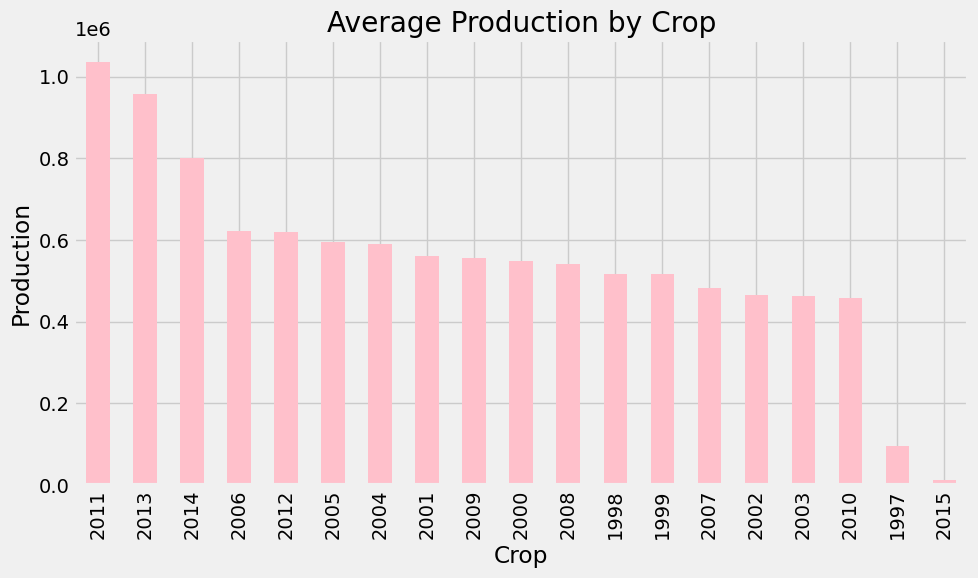

In [115]:
Crop_year_wise_production = df.groupby('Crop_Year')['Production'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
Crop_year_wise_production.head(20).plot(kind='bar', color='pink')
plt.title('Average Production by Crop')
plt.xlabel('Crop')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

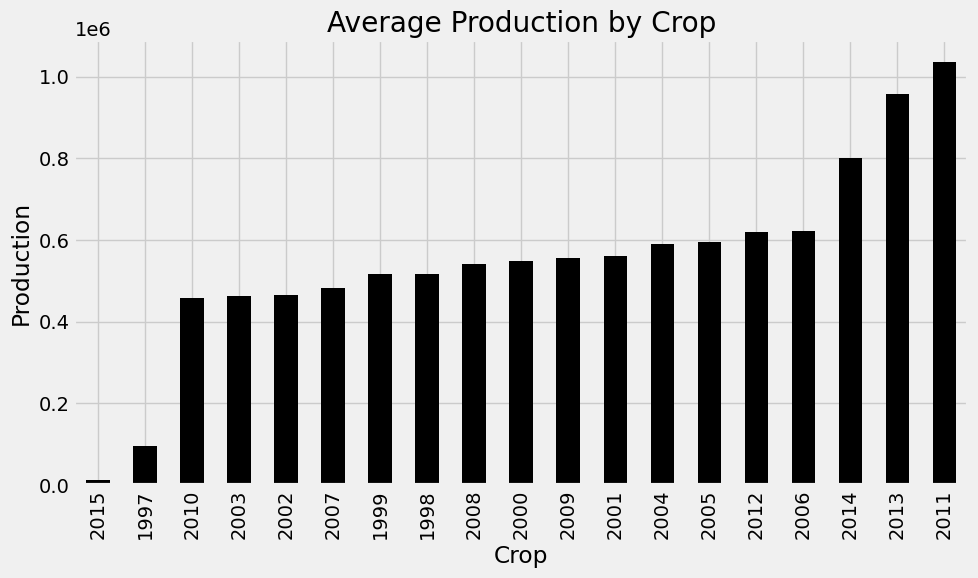

In [116]:
Crop_year_wise_production = df.groupby('Crop_Year')['Production'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
Crop_year_wise_production.head(20).plot(kind='bar', color='black')
plt.title('Average Production by Crop')
plt.xlabel('Crop')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

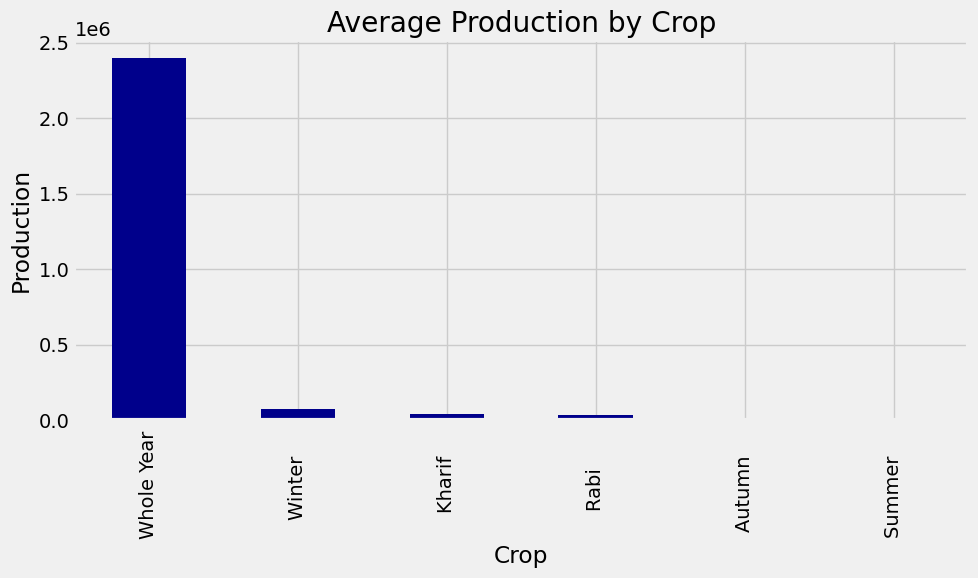

In [117]:
season_wise_production = df.groupby('Season')['Production'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
season_wise_production.head(20).plot(kind='bar', color='darkblue')
plt.title('Average Production by Crop')
plt.xlabel('Crop')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [118]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


<Axes: xlabel='count', ylabel='Crop'>

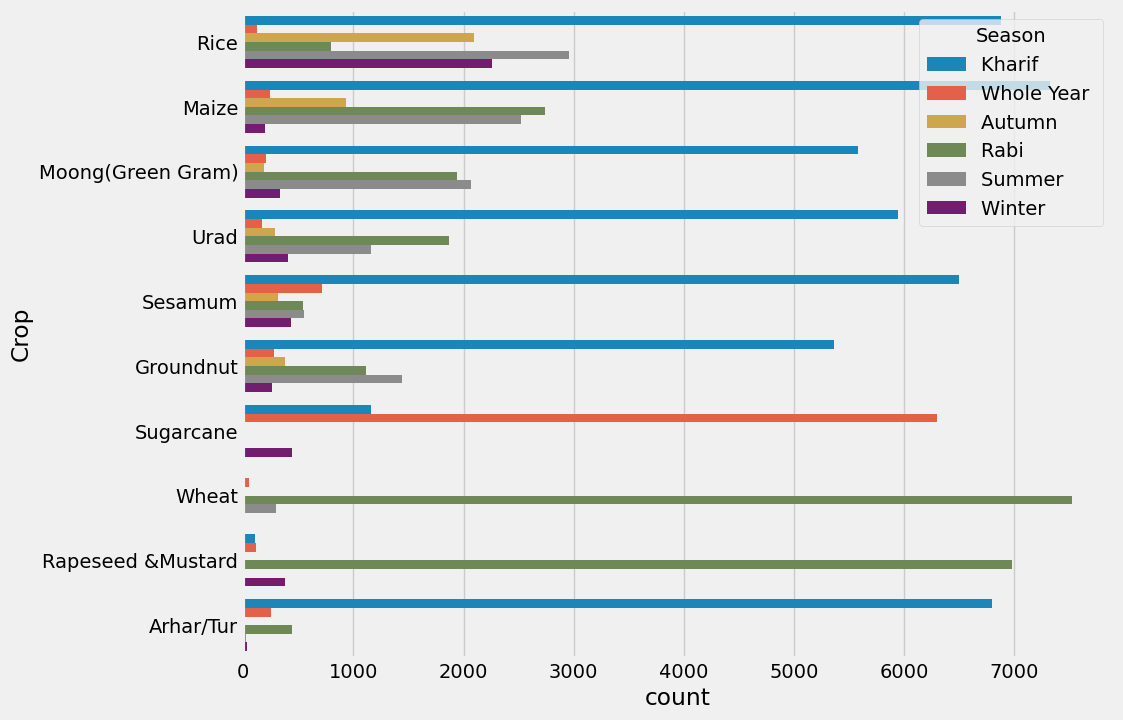

In [119]:
plt.figure(figsize = (10 , 8))
plt.style.use("fivethirtyeight")
sns.countplot(y= df["Crop"] , order = df["Crop"].value_counts().head(10).index , data = df , hue="Season")

<Axes: xlabel='count', ylabel='Crop'>

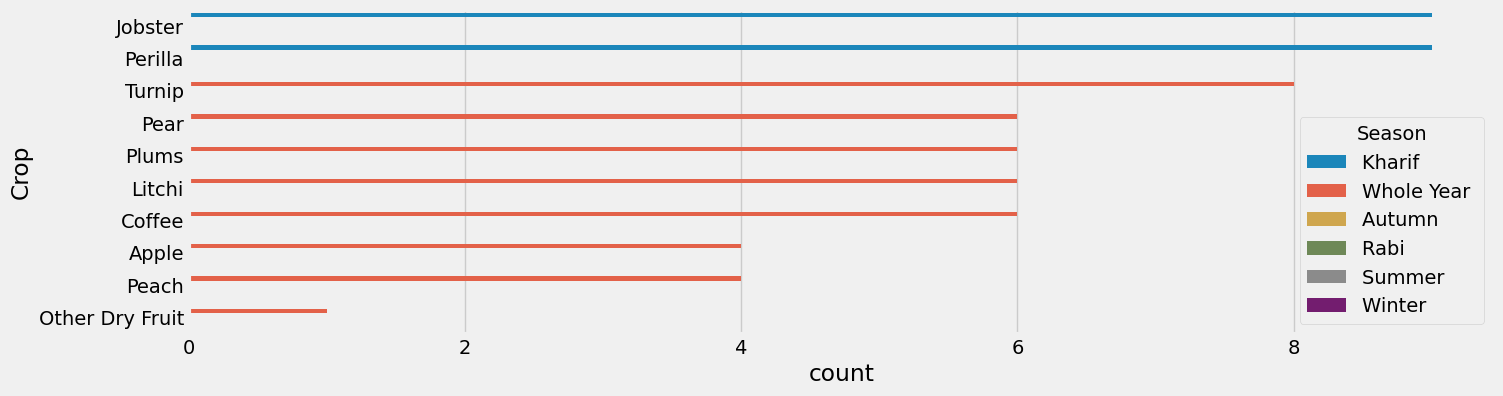

In [120]:
plt.figure(figsize = (15 , 4))
plt.style.use("fivethirtyeight")
sns.countplot(y= df["Crop"] , order = df["Crop"].value_counts().tail(10).index , data = df , hue="Season")

<Axes: >

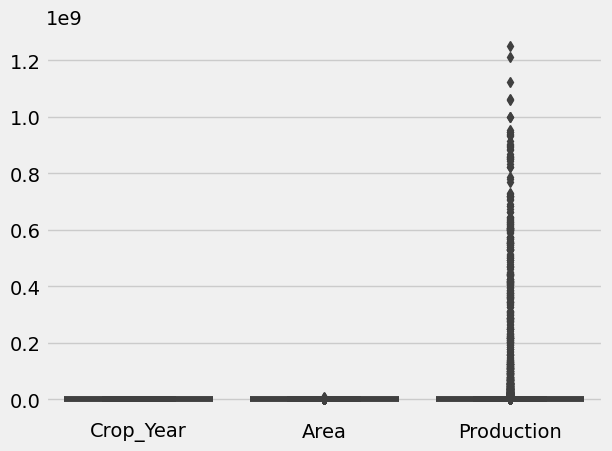

In [121]:
sns.boxplot(df)

In [122]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


### Feature Engineering

In [123]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [124]:
df["State_Name"].value_counts()

State_Name
Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                    

In [125]:
len(df["District_Name"].unique())

646

In [126]:
df["District_Name"].unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [127]:
urban = ["AGRA","AHMEDABAD","AJMER","ALAPPUZHA","ALIGARH","ALLAHABAD","AMBALA","AMRAVATI","AMRITSAR","ANAND","ANANTAPUR","ANANTNAG","ASHOKNAGAR","AURAIYA","AURANGABAD","AZAMGARH","BAGALKOT","BAGHPAT","BAHADURGARH","BAKSA","BALAGHAT","BALANGIR","BALASORE","BALOD","BALODA BAZAR","BALRAMPUR","BANAS KANTHA","BANDA","BANDIPORA","BANGALORE RURAL","BANKA","BANKURA","BANSWARA","BARABANKI","BARAMULLA","BARAN","BARDHAMAN","BAREILLY","BARGARH","BARPETA","BASTAR","BASTI","BATHINDA","BEED","BEGUSARAI","BELGAUM","BEMETARA","BENGALURU URBAN","BETUL","BHADRAK","BHAGALPUR","BHANDARA","BHARATPUR","BHARUCH","BHAVNAGAR","BHILWARA","BHIND","BHIWANI","BHOJPUR","BHOPAL","BIDAR","BIJAPUR","BIJNOR","BILASPUR","BISHNUPUR","BOKARO","BUDAUN","BULDHANA","BUNDI","BURHANPUR","CHAMARAJANAGAR","CHAMBA","CHAMOLI","CHAMPAWAT","CHANDAULI","CHANDEL","CHANDIGARH","CHANDRAPUR","CHANGLANG","CHATRA","CHHATARPUR","CHHINDWARA","CHIKBALLAPUR","CHIKMAGALUR","CHIRANG","CHITRADURGA","CHITTOOR","CHITTORGARH","CHURACHANDPUR","COOCHBEHAR","CUTTACK","DADRA AND NAGAR HAVELI","DAKSHIN DINAJPUR","DANTEWADA","DARBHANGA","DARRANG","DATIA","DAUSA","DAVANAGERE","DEHRADUN","DEOGARH","DEORIA","DHAMTARI","DHANBAD","DHAR","DHARMAPURI","DHARWAD","DHEMAJI","DHENKANAL","DHUBRI","DHULE","DIBRUGARH","DIMA HASAO","DIMAPUR","DINAJPUR DAKSHIN","DINAJPUR UTTAR","DINDIGUL","DINDORI","DODA","DURG","DURGAPUR","EAST DELHI","EAST GARO HILLS","EAST GODAVARI","EAST JAINTIA HILLS","EAST KAMENG","EAST KHASI HILLS","EAST SIANG","EAST SIKKIM","EAST SINGHBHUM","EAST SINGHBUM","ERNAKULAM","ETAH","ETAWAH","FAIZABAD","FARIDABAD","FARRUKHABAD","FATEHABAD","FATEHPUR","FIROZABAD","GANJAM","GARHWA","GAUTAM BUDDHA NAGAR","GAYA","GHAZIABAD","GHAZIPUR","GIRIDIH","GOALPARA","GODDA","GOLAGHAT","GONDA","GONDIA","GORAKHPUR","GULBARGA","GUNA","GUNTUR","GURDASPUR","GURGAON","GWALIOR","HAJIPUR","HALDWANI","HAMIRPUR","HANUMANGARH","HAPUR","HARDA","HARDOI","HASSAN","HAVERI","HINGOLI","HISAR","HOOGHLY","HOWRAH","HOSHANGABAD","HOSHIARPUR","HOSPET","HOSUR","HOWRAH","HYDERABAD","IDUKKI","IMPHAL EAST","IMPHAL WEST","INDORE","JABALPUR","JAGATSINGHAPUR","JAIPUR","JAISALMER","JALANDHAR","JALAUN","JALGAON","JALNA","JALORE","JALPAIGURI","JAMMU","JAMNAGAR","JAMTARA","JAMUI","JANJGIR-CHAMPA","JASHPUR","JAUNPUR","JEHANABAD","JHABUA","JHANSI","JHARGRAM","JHARSUGUDA","JHUNJHUNU","JIND","JODHPUR","JORHAT","JUNAGADH","KABIRDHAM","KACHCHH","KADAPA","KAIMUR (BHABUA)","KAITHAL","KAKINADA","KALAHANDI","KAMRUP","KANCHIPURAM","KANDHAMAL","KANGRA","KANKER","KANNUR","KANPUR DEHAT","KANPUR NAGAR","KAPURTHALA","KARAIKAL","KARAIKUDI","KARAULI","KARBI ANGLONG","KARGIL","KARIMGANJ","KARNAL","KARUR","KARWAR","KASARAGOD","KASGANJ","KATIHAR","KATNI","KAUSHAMBI","KENDRAPARA","KENDUJHAR","KHAGARIA","KHAMMAM","KHANDWA","KHARGONE","KHEDA","KHERI","KHORDHA","KHOWAI","KISHTWAR","KISHANGANJ","KISHTWAR","KODAGU","KODERMA","KOHIMA","KOKRAJHAR","KOLAR","KOLASIB","KOLHAPUR","KOLLAM","KOPPAL","KORAPUT","KORBA","KOREA","KOTA","KOTTAYAM","KOZHIKODE","KRISHNAGIRI","KRISHNANAGAR","KULGAM","KULLU","KUPWARA","KURNOOL","KURUKSHETRA","KUSHINAGAR","KUSHI NAGAR","KUTCH","LAKHIMPUR","LAKHIMPUR KHERI","LAKSHADWEEP","LALITPUR","LATEHAR","LATUR","LAWNGTLAI","LEH LADAKH","LOHARDAGA","LUDHIANA","LUCKNOW","LUDHIANA","LUNGLEI","MAHARAJGANJ","MAHASAMUND","MAHBUBNAGAR","MAHE","MAHOBA","MAINPURI","MALAPPURAM","MALDAH","MANDI","MANDLA","MANDSAUR","MANDYA","MANGALORE","MANJERI","MANSA","MAPUSA","MARGAO","MATHURA","MAU","MEDINIPUR EAST","MEDINIPUR WEST","MEERUT","MEHSANA","MIRZAPUR","MOGA","MOHALI","MORADABAD","MORENA","MORIGAON","MUKTSAR","MUMBAI","MUNGER","MURSHIDABAD","MUZAFFARNAGAR","MUZAFFARPUR","MYSORE","NABARANGPUR","NAGAON","NAGAPATTINAM","NAGARKURNOOL","NAGAUR","NAGPUR","NALANDA","NALBARI","NAMAKKAL","NANDED","NANDURBAR","NARAYANPUR","NAVI MUMBAI","NAVSARI","NAWADA","NAYAGARH","NEEMUCH","NELLORE","NIZAMABAD","NORTH AND MIDDLE ANDAMAN","NORTH DELHI","NORTH EAST DELHI","NORTH GOA","NORTH SIKKIM","NORTH TRIPURA","NORTH WEST DELHI","NORTH WEST GOA","NORTH WEST SIKKIM","NORTH WEST TRIPURA","NUAPADA","OSMANABAD","PALAKKAD","PALAMU","PALGHAR","PALI","PANCHKULA","PANCHMAHALS","PANIPAT","PANNA","PAPUM PARE","PARBHANI","PATAN","PATHANAMTHITTA","PATIALA","PATNA","PATTAN","PAURI GARHWAL","PERAMBALUR","PEREN","PHAGWARA","PILIBHIT","PITHORAGARH","PONDICHERRY","PRAKASAM","PRATAPGARH","PUDUKKOTTAI","PULWAMA","PUNE","PURI","PURNIA","PURULIA","RAE BARELI","RAICHUR","RAIGAD","RAIGANJ","RAIGARH","RAIPUR","RAISEN","RAJAHMUNDRY","RAJAURI","RAJGARH","RAJKOT","RAJNANDGAON","RAJPURA","RAJSAMAND","RAMANAGARA","RAMANATHAPURAM","RAMBAN","RAMGARH","RAMNAGAR","RAMPUR","RANCHI","RANGAREDDY","RANIGANJ","RATLAM","RATNAGIRI","RATNAPUR","RAYAGADA","REASI","REWARI","ROHTAK","ROHTAS","ROORKEE","RUPNAGAR","SABARKANTHA","SAGAR","SAHARANPUR","SAHARSA","SAHIBGANJ","SAIHA","SAIHA","SALEM","SAMASTIPUR","SAMBA","SAMBALPUR","SANGAREDDY","SANGRUR","SANGLI","SANT KABEER NAGAR","SANT RAVIDAS NAGAR","SARA","SARAIKELA-KHARSAWAN","SARAN","SAS NAGAR","SATARA","SATNA","SAWAI MADHOPUR","SEHORE","SENAPATI","SEONI","SERCHHIP","SHAHDOL","SHAJAPUR","SHAMLI","SHEIKHPURA","SHEOHAR","SHEOPUR","SHIMLA","SHIMOGA","SHIVPURI","SHOPIAN","SHRAWASTI","SIDDHARTH NAGAR","SIDHI","SIKAR","SIMDEGA","SINDHUDURG","SINGRAULI","SIRMAUR","SIRSA","SIVAGANGA","SIVASAGAR","SIWAN","SOLAN","SOLAPUR","SONBHADRA","SONEPUR","SONIPAT","SONITPUR","SOUTH ANDAMANS","SOUTH DELHI","SOUTH EAST DELHI","SOUTH GARO HILLS","SOUTH GOA","SOUTH SIKKIM","SOUTH TRIPURA","SOUTH WEST DELHI","SOUTH WEST GARO HILLS","SOUTH WEST GOA","SOUTH WEST KHASI HILLS","SRIKAKULAM","SRINAGAR","SULTANPUR","SUNDARGARH","SURAJPUR","SURAT","SURENDRANAGAR","SURGUJA","TAMENGLONG","TAPI","TARN TARAN","TARN TARAN SAHIB","THANE","THANJAVUR","THE NILGIRIS","THENI","THIRUVALLUR","THIRUVANANTHAPURAM","THIRUVANNAMALAI","THOOTHUKKUDI","THOUBAL","THRISSUR","TIKAMGARH","TINSUKIA","TIRAP","TIRUCHIRAPPALLI","TIRUNELVELI","TIRUPATI","TIRUPPUR","TIRUVANNAMALAI","TONK","TRICHY","TRIPURA","TUMKUR","UDALGURI","UDAM SINGH NAGAR","UDAIPUR","UDAIPURWATI","UDALGURI","UDAM SINGH NAGAR","UJJAIN","UKHRUL","UNA","UNNAO","UNOKOTI","UPPER SIANG","UPPER SUBANSIRI","UPPER TIRAP","UTTARA KANNADA","UTTARAKASHI","UTTAR DINAJPUR","UTTAR KASHI","UTTARKASHI","UTTAR KANNADA","UTTAR KANNAD","VADODARA","VAISHALI","VALSAD","VARANASI","VELLORE","VIDISHA","VIJAYAWADA","VIKARABAD","VILUPPURAM","VIRUDHUNAGAR","VISAKHAPATANAM","VIZIANAGARAM","WARANGAL","WARDHA","WASHIM","WAYANAD","WEST DELHI","WEST GODAVARI","WEST JAINTIA HILLS","WEST KAMENG","WEST KHASI HILLS","WEST SIANG","WEST SIKKIM","WEST SINGHBHUM","WEST SINGHBUM","WEST TRIPURA","WESTERN KHASI HILLS","YADGIR","YAMUNANAGAR","YANAM","YAVATMAL","YERCAUD","ZUNHEBOTO"]

In [128]:
len(urban)

574

In [129]:
# len(rural_areas)

In [130]:
def replace_with_semi(value):
    if value in urban:
        return "Urban"
    else:
        return "Rural"

In [131]:
df["District_Name"] = df["District_Name"].apply(replace_with_semi)

In [132]:
len(df["District_Name"].unique())

2

In [133]:
df["District_Name"].unique()

array(['Rural', 'Urban'], dtype=object)

In [134]:
df["District_Name"].value_counts()

District_Name
Urban    192518
Rural     53573
Name: count, dtype: int64

In [135]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,Rural,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,Rural,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,Rural,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,Rural,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,Rural,2000,Whole Year,Cashewnut,720.0,165.0


### Label Encoding 

In [136]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == "O"]

In [137]:
le = LabelEncoder()
for i in cat_features:
    df[i] = le.fit_transform(df[i])

In [138]:
cat_features

['State_Name', 'District_Name', 'Season', 'Crop']

In [139]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,0,2000,1,2,1254.0,2000.0
1,0,0,2000,1,74,2.0,1.0
2,0,0,2000,1,95,102.0,321.0
3,0,0,2000,4,7,176.0,641.0
4,0,0,2000,4,22,720.0,165.0


In [140]:
df["Production"].median()

729.0

In [141]:
df["Production"].mean()

582503.4422509808

In [144]:
df["Production"].mode()

0    1.0
Name: Production, dtype: float64

In [66]:
df["Production"] = df["Production"].fillna(df["Production"].median())

In [67]:
# splitting data into x and y 

In [68]:
df["State_Name"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [69]:
x = df.drop("Crop", axis = 1)
y = df["Crop"]

In [70]:
x_train , x_test , y_train , y_test =train_test_split(x , y , test_size=0.3 , random_state=42)

### feature Scaling

In [71]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Model Building